## Import the required Libraries

In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.


## Initiate the Model

In [2]:
classifier = VGG16()
print(classifier.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
bloc

## Load the Image

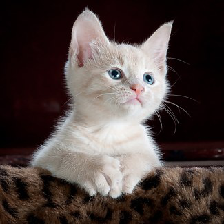

In [3]:
new_image= image.load_img('../Data/Prediction/test_image_1.jpg', target_size=(224, 224))
new_image

## Change the image to array

In [4]:
transformed_image= image.img_to_array(new_image)
transformed_image.shape


(224, 224, 3)

## Expand the tranfromed image with 4th Dimension

In [5]:
transformed_image=np.expand_dims(transformed_image,axis=0)
transformed_image.shape

(1, 224, 224, 3)

## Preprocess the Image

In [6]:
transformed_image=preprocess_input(transformed_image)
transformed_image

array([[[[-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         ...,
         [-102.939, -114.779, -117.68 ],
         [-102.939, -114.779, -117.68 ],
         [-103.939, -116.779, -117.68 ]],

        [[-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         ...,
         [-103.939, -116.779, -117.68 ],
         [-103.939, -116.779, -117.68 ],
         [-103.939, -116.779, -117.68 ]],

        [[-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         [-102.939, -116.779, -121.68 ],
         ...,
         [-103.939, -116.779, -117.68 ],
         [-103.939, -116.779, -117.68 ],
         [-103.939, -116.779, -117.68 ]],

        ...,

        [[ -74.939,  -73.779,  -57.68 ],
         [ -91.939,  -90.779,  -74.68 ],
         [ -98.939,  -97.779,  -81.68 ],
         ...,
         [ -85.939,  -92.779,  -88.68 ],
         [ -82.939,  -

## Create a predictor variable

In [7]:
y_pred= classifier.predict(transformed_image)
y_pred

array([[2.81155965e-09, 2.20523859e-07, 1.55958055e-08, 7.36266941e-08,
        5.88714784e-08, 4.52034413e-07, 5.20896615e-09, 7.53415520e-07,
        1.54636689e-06, 5.73676573e-08, 3.14125104e-09, 1.27633182e-09,
        1.64991093e-07, 1.30675195e-08, 7.48315909e-10, 6.14375262e-09,
        1.28625217e-08, 2.63904685e-08, 9.85927251e-09, 1.43010026e-09,
        1.54569069e-09, 2.27459168e-07, 5.58701139e-08, 1.67028162e-07,
        9.08437769e-08, 1.13857590e-09, 9.85258009e-09, 5.51692780e-09,
        4.85418861e-09, 1.93991994e-07, 7.10918380e-10, 2.34706343e-09,
        4.40968417e-09, 8.54253279e-10, 8.10707768e-09, 2.25196284e-09,
        1.13177991e-08, 3.08218673e-09, 1.77891295e-07, 3.37317196e-08,
        2.10853504e-08, 5.49144588e-08, 2.02370920e-08, 1.94341387e-09,
        2.82686869e-07, 2.08000692e-08, 8.02847282e-08, 1.44499754e-08,
        1.91879040e-10, 5.00411101e-10, 4.22271240e-09, 4.12553263e-08,
        5.78171040e-08, 1.05852660e-08, 2.50359534e-07, 2.450037

## Check the shape of the array

In [9]:
y_pred.shape

(1, 1000)

## Make the predictions

In [10]:
from keras.applications.vgg16 import decode_predictions
decode_predictions(y_pred,top=5)

[[('n02124075', 'Egyptian_cat', 0.4049535),
  ('n02123045', 'tabby', 0.3942576),
  ('n02127052', 'lynx', 0.10080725),
  ('n02123159', 'tiger_cat', 0.05541087),
  ('n02123394', 'Persian_cat', 0.012944666)]]

# Make the predictions in readable form

In [11]:
label = decode_predictions(y_pred)
# retrieve the most likely result, i.e. highest probability
decoded_label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (decoded_label[1], decoded_label[2]*100 ))

Egyptian_cat (40.50%)
